# Lab1. 线性回归

1. 读取数据
2. 可视化
3. 计算损失函数
4. 解析法求解最优解
5. 梯度下降
6. 等高线代价函数

# 1.单变量线性回归

## 1.1 读取数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ex1data1 = './ex1data1.txt'
'''

code here


'''
data1 = np.loadtxt(ex1data1, delimiter=',')
print(data1.shape,data1.ndim)

(97, 2) 2


## 1.2 可视化数据

(97,) 1


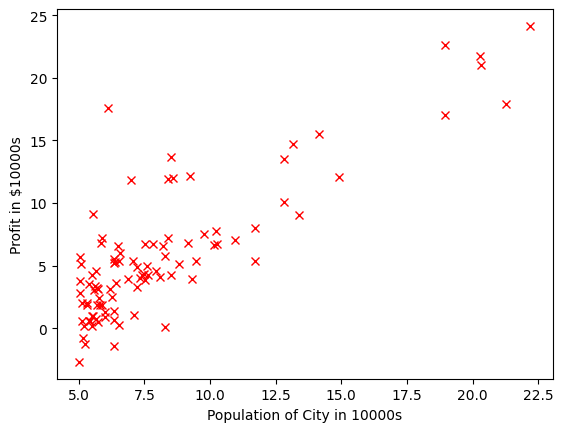

In [3]:
x=data1[:,0]
y=data1[:,1]
print(x.shape, x.ndim)

#使用plt.xlabel plt.ylabel plt.plot函数来进行数据可视化
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
'''

code here


'''
plt.plot(x, y, 'xr')

## 1.3 训练线性回归模型
### 1.3.1 数据预处理

In [4]:
#使用m存放数据点的个数
#使用np.ones创建名为x0的二维数组，规模为m*1
#使用x1存放读入数据第一列“人口数量”，存为列向量
#使用np.hstack函数将x0和x1进行合并存放于x,打印x
#使用y存放读入数据第二列“收益”，存为列向量
#使用np.zeros初始化theta,规模为2*1,打印theta

m=data1.shape[0]
x0 = np.ones((m,1))
x1 = data1[:,[0]]
X = np.hstack((x0,x1)).T
y = data1[:,[1]].T
'''

code here


'''
print(X.shape,X.ndim)
print(X.T.shape,X.T.ndim)
print(y.shape,y.ndim)

(2, 97) 2
(97, 2) 2
(1, 97) 2


### 1.3.2 代价函数

In [5]:
#利用numpy中的函数编写代价函数
#注意避免编写一个完整的长公式，分步计算便于调试
#注意数组维度
def computeCost(X, y, w):
    m = len(y.T)
    L = 0
    s1 =(X.T).dot(w)
    s2 = s1-y.T
    s3 = np.sum(s2 ** 2)
    s4 = s3/(2*m)
    L = s4
    '''

    code here


    '''
    return L

theta = np.zeros((2,1))
print(computeCost(X, y, theta))

32.072733877455676


### 1.3.3 用于单变量线性回归的梯度下降法算法

In [6]:
#定义学习率alpha
#迭代次数iteration
#使用cost存放每次迭代后计算出的代价函数的取值
#进行梯度下降
def gradientDescent(X, y, w, alpha, num_iters):
    m = X.shape[1]
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        '''

        code here


        '''
        temp1 = w[0,0] - ((alpha / (m)) * np.sum(np.dot(X.T, w)-y.T))
        temp2 = w[1,0] - ((alpha / (m)) * np.sum(X[1,].dot(np.dot(X.T, w)-y.T)))
        w[0,0] = temp1
        w[1,0] = temp2
        cost_history[i] = computeCost(X, y, w)
    return w, cost_history

alpha = 0.01   # alpha是学习率
num_iters = 1500   # 迭代次数
w, cost_history = gradientDescent(X, y, theta, alpha, num_iters)
print(w)

[[-3.63029144]
 [ 1.16636235]]


### 1.3.4 通过求导法直接计算最优解

In [7]:
xxt = np.dot(X, X.T)
xyt = np.dot(X, y.T)
xxt_inv = np.linalg.inv(xxt)

theta_mat = np.matmul(np.linalg.inv(np.matmul(X, X.T)), np.matmul(X, y.T))

## 1.4 使用训练得到的模型进行预测并可视化结果

In [8]:
#使用训练的带的参数，代入x0=5.0求得对应的y0
#使用训练的带的参数，代入x1=25.0求得对应的y1
'''

code here


'''
x0 = 5.0
x1 = 25.0
y0 = w[0] + w[1] * x0
y1 = w[0] + w[1] * x1
print(y0, y1)

[2.20152031] [25.52876732]


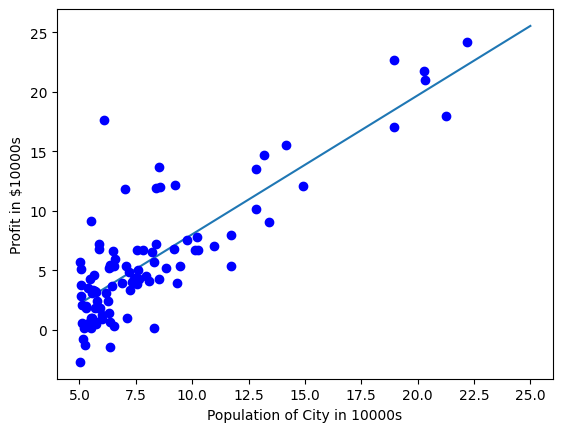

In [9]:
#利用plt.xlabel plt.ylabel设定坐标轴名称
#利用plt.plot画出拟合的直线，可利用上一步计算得到的两个坐标点plt.plot((x0, x1), (y0, y1))
#利用plt.plot画出原始数据散点图
plt.xlabel('Population of City in 10000s')
plt.ylabel('Profit in $10000s')
'''

code here


'''
plt.plot((x0, x1), (y0, y1))
plt.plot(data1[:,0], data1[:,1], "ob")

## 1.5 可视化线性回归的代价函数

Visualizing L(w_0, w_1) ...


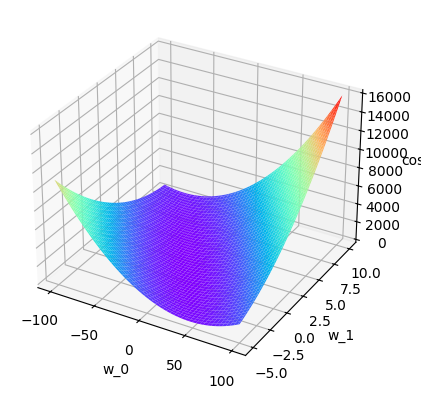

In [10]:
print('Visualizing L(w_0, w_1) ...')
w0_vals = np.linspace(-100, 100, 100)
w1_vals = np.linspace(-5, 10, 100)
cost_vals = np.zeros((len(w0_vals), len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        cost_vals[i, j] = computeCost(X, y, np.array([[w0_vals[i]], [w1_vals[j]]]))
cost_vals = cost_vals.T

w0_vals_m, w1_vals_m = np.meshgrid(w0_vals, w1_vals)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(w0_vals_m, w1_vals_m, cost_vals, cmap='rainbow')
ax.set_xlabel('w_0')
ax.set_ylabel('w_1')
ax.set_zlabel('cost')
plt.show()

## 1.6 绘制等高线代价函数

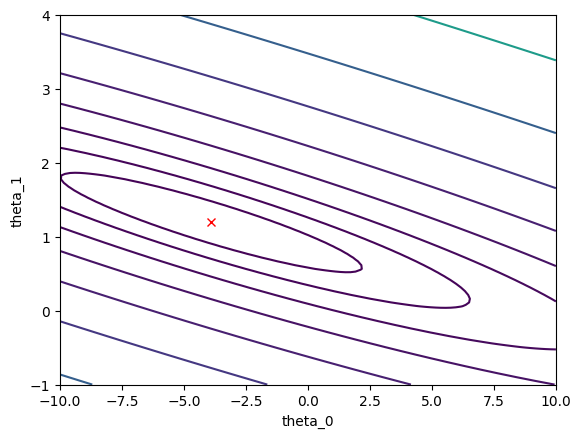

In [11]:
theta0_val = np.linspace(-10, 10, 100)
theta1_val = np.linspace(-1, 4, 100)
cost_val = np.zeros((len(theta0_val), len(theta1_val)))
for i in range(len(theta0_val)):
    for j in range(len(theta1_val)):
        theta_val = np.array([[theta0_val[i]], [theta1_val[j]]])
        cost_val[i, j] = computeCost(X, y, theta_val)

cost_val = cost_val.T

plt.contour(theta0_val, theta1_val, cost_val, np.logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.plot(theta_mat[0], theta_mat[1], 'rx')
plt.show()

# 2.多变量线性回归

## 2.0 读取数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#使用m存放数据点的个数
#使用x存放读入数据，取[0，2）这个区间的列，不包括2，存为列向量
#使用y存放读入数据，存为列向量
#使用np.zeros初始化theta,规模为2*1,打印theta
#可以输出前10行数据，查看数据内容
data = np.loadtxt('./ex1data2.txt', delimiter=',')

x=data[:,0:2]
y=data[:,2]
theta=np.zeros((3,1))
x[0:10]

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00],
       [1.985e+03, 4.000e+00],
       [1.534e+03, 3.000e+00],
       [1.427e+03, 3.000e+00],
       [1.380e+03, 3.000e+00],
       [1.494e+03, 3.000e+00]])

## 2.1 特征规范化

In [2]:
#特征规范化
#计算mu、sigma
#返回规范化后的结果
def featureNormalize(x):
    mu = np.mean(x, axis = 0)
    std_sigma = np.std(x, axis = 0, ddof = 1)
    # ddof = k,最后平⽅和除以 n - k
    return (x - mu) / std_sigma, mu, std_sigma

## 2.2使用向量法实现多变量的梯度下降法

### 2.2.1 向量化代价函数

In [3]:
#根据这个向量化的代价函数(请看实验说明书)，升级原先的computeCost()到computeCostMulti()函数
def computeCostMulti(X, y, theta):
    m = len(y.T)
    L = 0
    s1 =(X.T).dot(theta)-y.T
    L = 1/(2*m) * np.sum(s1.T.dot(s1))
    return L

x, mu, std_sigma = featureNormalize(x)
m=data.shape[0]
x0 = np.ones((m,1))
X = np.hstack((x0,x)).T
y = data[:,[2]].T
print(X)
print(X.shape,X.ndim)
print(X.T.shape,X.T.ndim)
print(y.shape,y.ndim)
print(y)
print(computeCostMulti(X, y, theta))

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.30009869e-01 -5.04189838e-01  5.02476364e-01 -7.35723065e-01
   1.25747602e+00 -1.97317285e-02 -5.87239800e-01 -7.21881404e-01
  -7.81023044e-01 -6.37573110e-01 -7.63567023e-02 -8.56737193e-04
  -1.39273340e-01  3.1172

### 2.2.2 向量化多变量梯度下降法

In [4]:
#根据向量化的梯度(请看实验说明书)，升级gradientDescent()到gradientDescentMulti()函数。
#定义学习率alpha
#迭代次数iteration
#使用cost存放每次迭代后计算出的代价函数的取值
#进行梯度下降
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = X.shape[1]
    cost_history = np.zeros(num_iters)
    for i in range(num_iters):
        temp1 = theta[0,0] - ((alpha / (m)) * np.sum(np.dot(X.T, theta)-y.T))
        temp2 = theta[1,0] - ((alpha / (m)) * np.sum(X[1,].dot(np.dot(X.T, theta)-y.T)))
        temp3 = theta[2,0] - ((alpha / (m)) * np.sum(X[2,].dot(np.dot(X.T, theta)-y.T)))
        theta[0,0] = temp1
        theta[1,0] = temp2
        theta[2,0] = temp3
        cost_history[i] = computeCostMulti(X, y, theta)
    return theta, cost_history

#alpha = 0.01   # alpha是学习率
#num_iters = 1500   # 迭代次数
#w, cost_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
#print(w)

### 2.2.3 房价预测(先对输入数据进行规范化)

In [11]:
#先规范化数据
#使用vstack，拓展规范化后的数据
#可以打印出数据查看数据内容
def featureNormalizeTest(x, mu, sigma):
    return (x - mu) / sigma
t = np.array([[1650,3]])
t = featureNormalizeTest(t, mu, std_sigma)

bias = np.ones((1, 1))  # 形状 (1, 1)
t_with_bias = np.vstack([bias, t.T])
print("添加偏置后的数据:\n", t_with_bias)

y = (data[:, 2][:, np.newaxis]).T

(1, 2) 2
添加偏置后的数据:
 [[ 1.        ]
 [-0.4412732 ]
 [-0.22367519]]
(1, 2) 2


### 2.2.4 通过学习曲线（Learning Curve）选择合适的学习率（Learning Rate）

65591548106.45744
cost= [6.17598537e+10 5.81645743e+10 5.47907651e+10 ... 2.04328005e+09
 2.04328005e+09 2.04328005e+09]
[[340412.65957447]
 [110631.05008085]
 [ -6649.47407283]]


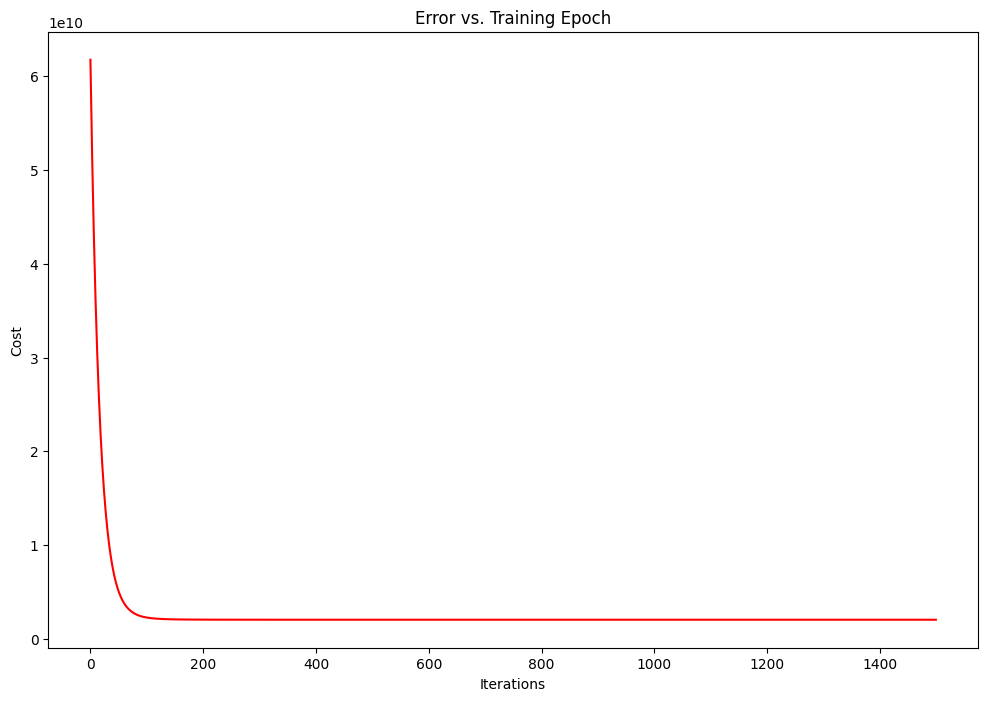

In [6]:
theta = np.zeros((data.shape[1],1))
print(computeCostMulti(X, y, theta))
theta_star, J_hist = gradientDescentMulti(X, y, theta, 0.03, 1500)
print("cost=",J_hist)
print(theta_star)
#绘制学习曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1500), J_hist, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 2.3 使用解析法最小化代价函数

In [9]:
#编写公式直接求取theta最优解
xxt = np.dot(X, X.T)
xyt = np.dot(X, y.T)
xxt_inv = np.linalg.inv(xxt)

theta_mat = np.matmul(np.linalg.inv(np.matmul(X, X.T)), np.matmul(X, y.T))
print(theta_mat)

[[340412.65957447]
 [110631.05027885]
 [ -6649.47427082]]


## 2.4 使用训练得到的模型进行预测

In [21]:
#使用训练得到的模型进行预测
#注意，输入的数据需要规范化
y1 = np.sum(np.dot(t_with_bias.T,theta_star))
y2 = np.sum(np.dot(theta_star.T,t_with_bias))

print(y1)
print(y2)

293081.4643779782
293081.4643779782
